# Data Bootcamp Final Project (Naoji Nomura)
[Project outline]
Represent how 3-point shooting contribute to win regular season games in NBA and how the contribution has changed so far.

[Idea]
Since the 3-point shooting rule was established in 1979, 3-point shooting has become a key to win basketball games because it is efficient to get points . In fact, the number of 3-points shooting has been increasing in the following article.

http://nordic.businessinsider.com/nba-three-pointers-2017-1

I guess that a team with better 3-point shooters would win season games more. Also, it would be more obvious in recent years than 10-20 years ago. If it’s not, I try to find what actions, such as assist, rebound, block, and steal, well-contribute to win games.

[Data]
NBA stats data in each team between 1980 and 2017. Data sources come from the following URL.

https://www.basketball-reference.com/leagues/NBA_stats.html

Supplement data: "Year_result.xlsx", "1980Stats.xlsx", "2000Stats.xlsx", "2010Stats.xlsx", "2017Stats.xlsx"

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import sys
import math

%matplotlib inline

print('Today is', dt.date.today())
print('Python version:\n', sys.version, sep='')

Today is 2017-12-21
Python version:
3.6.2 |Anaconda, Inc.| (default, Sep 21 2017, 18:29:43) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]


In [2]:
df = pd.read_excel('Year_result.xlsx')
df = df.sort_values('Season', ascending = True)
df = df.tail(39)
df1 = df[['Season','FG','FGA','3P','3PA']]
df1 = df1.set_index('Season')
df1['2P']= df1['FG'] - df1['3P']
df1['2PA']= df1['FGA'] - df1['3PA']
df1 = df1.drop(['FG', 'FGA'], axis=1)

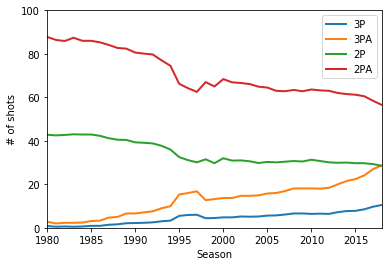

In [3]:
fig,ax = plt.subplots()
ax.set_ylim(0,100)
ax.set_ylabel('# of shots')
df1.plot(ax=ax, lw=2)

The figure above shows that the transition of the average number of 3 point-shots(3P), 3 point-shots attempt(3PA), 2 point-shots(2P), and 2 point-shots attempt(2PA) in each year. As the figure says, the number of both 2 point-shots and 2 point-shots attempt decrease, while 3 point-shots and 3 point-shots attemp increase. It means that 3 point-shots is becoming more important than 3 point-shots.

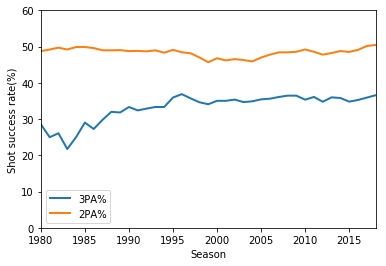

In [4]:
df1['3PA%'] = df1['3P'] / df1['3PA'] * 100
df1['2PA%'] = df1['2P'] / df1['2PA'] * 100
df1 = df1.drop(['3P', '3PA', '2P', '2PA'], axis=1)
fig,ax = plt.subplots()
ax.set_ylim(0,60)
ax.set_ylabel('Shot success rate(%)')
df1.plot(ax=ax, lw=2)

The figure above says that the success rate of 2 point-shots has not changed over 35 years, while that of 3 point-shots has become increased, meaning that 3 point-shots is efficient to get points and important to win games. I will desribe the relation between 3 point-shots and a winning team in the following.

In [5]:
df_1980 = pd.read_excel('1980Stats.xlsx')
df_2000 = pd.read_excel('2000Stats.xlsx')
df_2010 = pd.read_excel('2010Stats.xlsx')
df_2017 = pd.read_excel('2017Stats.xlsx')

In [6]:
df_1980_1 = df_1980[['W', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'PTS']]
df_2000_1 = df_2000[['W', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'PTS']]
df_2010_1 = df_2010[['W', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'PTS']]
df_2017_1 = df_2017[['W', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'PTS']]
df_1980_1 = df_1980_1.drop(22)
df_2000_1 = df_2000_1.drop(29)
df_2010_1 = df_2010_1.drop(30)
df_2017_1 = df_2017_1.drop(30)
df_1980_2 = df_1980_1[['W','3P']]
df_2000_2 = df_2000_1[['W','3P']]
df_2010_2 = df_2010_1[['W','3P']]
df_2017_2 = df_2017_1[['W','3P']]

In [7]:
df_1980_1.corr()

,W,3P,3PA,3P%,2P,2PA,2P%,PTS
W,1.000000,-0.033573,-0.100957,-0.040729,0.233138,0.022599,0.311040,0.387396
3P,-0.033573,1.000000,0.970453,0.781541,-0.309156,-0.252405,-0.134702,0.116528
3PA,-0.100957,0.970453,1.000000,0.657375,-0.268314,-0.219404,-0.114213,0.161314
3P%,-0.040729,0.781541,0.657375,1.000000,-0.276123,-0.176377,-0.179707,0.001176
2P,0.233138,-0.309156,-0.268314,-0.276123,1.000000,0.736199,0.552612,0.781050
2PA,0.022599,-0.252405,-0.219404,-0.176377,0.736199,1.000000,-0.156723,0.520368
2P%,0.311040,-0.134702,-0.114213,-0.179707,0.552612,-0.156723,1.000000,0.496970
PTS,0.387396,0.116528,0.161314,0.001176,0.781050,0.520368,0.496970,1.000000


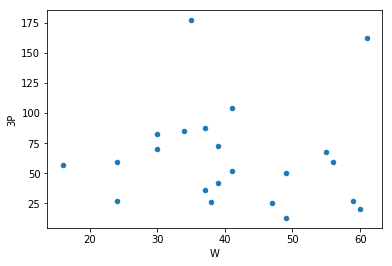

In [8]:
df_1980_2.plot.scatter(x='W', y='3P')

The table above shows the correlation matrix. W means the number of winning games and PTS means total points in a season. '3P%' and '2P%' are calculated by "3P divide 3PA". NBA has 22-30 teams, so I calculate correlation between the number of winning games and another factor every year. We intuitively understand that teams getting high points win games. In 1980, the correlation between PTS and W is 0.39, meaning that it slightly has the correlation. However, we cannot see any correlation between W and '3P', '3PA', and '3P%', so 3P shot is not so important when the 3P points shot rule was implemented.

The figure represents that the number of winning games and the number of 3P shots. As the correlation parameter says, we cannot see no relation between x-axis and y-axis.

In [9]:
df_2000_1.corr()

,W,3P,3PA,3P%,2P,2PA,2P%,PTS
W,1.000000,0.051583,-0.032360,0.311893,0.361949,-0.058954,0.725998,0.446779
3P,0.051583,1.000000,0.965324,0.275591,-0.463977,-0.668487,0.323345,0.447883
3PA,-0.032360,0.965324,1.000000,0.023128,-0.436086,-0.607198,0.267530,0.434618
3P%,0.311893,0.275591,0.023128,1.000000,-0.167037,-0.347884,0.296265,0.122744
2P,0.361949,-0.463977,-0.436086,-0.167037,1.000000,0.828185,0.352981,0.490819
2PA,-0.058954,-0.668487,-0.607198,-0.347884,0.828185,1.000000,-0.230749,0.120221
2P%,0.725998,0.323345,0.267530,0.296265,0.352981,-0.230749,1.000000,0.661578
PTS,0.446779,0.447883,0.434618,0.122744,0.490819,0.120221,0.661578,1.000000


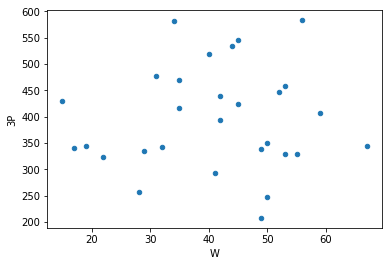

In [10]:
df_2000_2.plot.scatter(x='W', y='3P')

Even 20 years after 3 point rule was valid, 3P shot was not so importan, while the correlation between '2P%' and the number of winning games is very high, 0.73. Just looking back in the NBA history, Los Angels Lakers became the champion in 2000 and its team has Shaquille Rashaun O'Neal, who is the most famous and powerful inside player in early 2000s. Also, Kobe Bryant, who is a famous all-round player, was in the team, so 3P shot is not so valuable at that time.

In [11]:
df_2010_1.corr()

,W,3P,3PA,3P%,2P,2PA,2P%,PTS
W,1.000000,0.346753,0.255521,0.531855,-0.091755,-0.431905,0.625000,0.447418
3P,0.346753,1.000000,0.975399,0.658431,-0.608972,-0.782288,0.462369,0.541476
3PA,0.255521,0.975399,1.000000,0.481279,-0.694315,-0.794765,0.351553,0.410723
3P%,0.531855,0.658431,0.481279,1.000000,-0.033708,-0.401998,0.665443,0.774325
2P,-0.091755,-0.608972,-0.694315,-0.033708,1.000000,0.830314,0.047863,0.250984
2PA,-0.431905,-0.782288,-0.794765,-0.401998,0.830314,1.000000,-0.515513,-0.163115
2P%,0.625000,0.462369,0.351553,0.665443,0.047863,-0.515513,1.000000,0.670174
PTS,0.447418,0.541476,0.410723,0.774325,0.250984,-0.163115,0.670174,1.000000


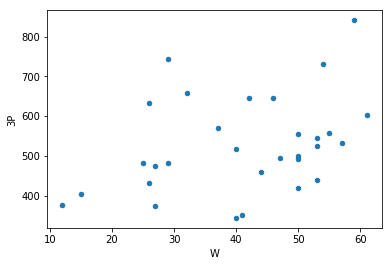

In [12]:
df_2010_2.plot.scatter(x='W', y='3P')

In [13]:
df_2017_1.corr()

,W,3P,3PA,3P%,2P,2PA,2P%,PTS
W,1.000000,0.445811,0.275321,0.636394,-0.069741,-0.342235,0.626289,0.507632
3P,0.445811,1.000000,0.956327,0.414871,-0.697685,-0.896217,0.689809,0.577422
3PA,0.275321,0.956327,1.000000,0.133313,-0.728067,-0.872965,0.590802,0.497966
3P%,0.636394,0.414871,0.133313,1.000000,-0.141450,-0.348312,0.477502,0.371577
2P,-0.069741,-0.697685,-0.728067,-0.141450,1.000000,0.893229,-0.108906,0.118959
2PA,-0.342235,-0.896217,-0.872965,-0.348312,0.893229,1.000000,-0.542414,-0.264429
2P%,0.626289,0.689809,0.590802,0.477502,-0.108906,-0.542414,1.000000,0.822499
PTS,0.507632,0.577422,0.497966,0.371577,0.118959,-0.264429,0.822499,1.000000


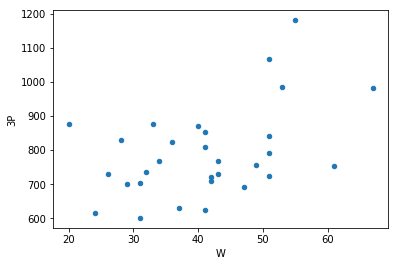

In [14]:
df_2017_2.plot.scatter(x='W', y='3P')

After 2010, the correlation between 3P and W became high, 0.45. It obviously means that players make more 3P shots, a team would win games. Currently, some major NBA players are in the Guard position, so the result seems to prove the current player trend.

# Conclusion
This project shows that the number of 3 point shots is increasing in recent years and 3 point shots have become more important to win games than 2 point shots, as the correlation between the number of 3 point shots and the number of winning games shows. In the basketball history, we enjoy watching powerful inside play, 2 point shots, such as dunk, but this change of play style may give us another side of entertainment in basketball.